# Question 5: Programming (40 points):
Use decision tree and random forest to train the titanic.csv dataset included in the assignment.
- Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.
- Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.
- Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.
- Step 4: For the pruned tree, report its accuracy on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)
- Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set) Check whether there is improvement as compared to a single tree obtained in Step 4.

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [4]:
data = pd.read_csv("Titanic.csv")
data.head(5)

Unnamed: 0 pclass  survived                             name     sex  \
0           1    1st         1    Allen, Miss. Elisabeth Walton  female   
1           2    1st         1   Allison, Master. Hudson Trevor    male   
2           3    1st         0     Allison, Miss. Helen Loraine  female   
3           4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4           5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   

       age  sibsp  parch  ticket        fare    cabin     embarked boat  \
0  29.0000      0      0   24160  211.337494       B5  Southampton    2   
1   0.9167      1      2  113781  151.550003  C22 C26  Southampton   11   
2   2.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
3  30.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
4  25.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   

    body                        home.dest  
0    NaN                     St Louis, MO  
1    NaN  Montreal, PQ / Chesterville, ON  
2    NaN  Montreal, PQ / Chesterville, ON  
3  135.0  Montreal, PQ / Chesterville, ON  
4    NaN  Montreal, PQ / Chesterville, ON

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


# STEP 1: 
- fill missing instances in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [6]:
for i in data.columns:
    if data[i].dtype == object:
        # print(i)
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)
print(data.info())

# Take a random 80% samples for training and the rest 20% for test

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Train dataset with {len(train_data)} instances and Test dataset with {len(test_data)} instances")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1309 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1309 non-null   float64
 10  cabin       1309 non-null   object 
 11  embarked    1309 non-null   object 
 12  boat        1309 non-null   object 
 13  body        1309 non-null   float64
 14  home.dest   1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB
None
Train dataset with 1047 instances and Test dataset with 262 instances


In [7]:
print("Train Data: ")
train_data.head(5)

Train Data: 


Unnamed: 0 pclass  survived                       name     sex  \
772         773    3rd         0            Dika, Mr. Mirko    male   
543         544    2nd         0          Reeves, Mr. David    male   
289         290    1st         1        Taussig, Miss. Ruth  female   
10           11    1st         0     Astor, Col. John Jacob    male   
147         148    1st         0  Harrington, Mr. Charles H    male   

           age  sibsp  parch      ticket        fare        cabin  \
772  17.000000      0      0      349232    7.895800  C23 C25 C27   
543  36.000000      0      0  C.A. 17248   10.500000  C23 C25 C27   
289  18.000000      0      2      110413   79.650002          E68   
10   47.000000      1      0    PC 17757  227.524994      C62 C64   
147  29.881135      0      0      113796   42.400002  C23 C25 C27   

        embarked boat        body         home.dest  
772  Southampton   13  160.809917      New York, NY  
543  Southampton   13  160.809917  Brighton, Sussex  
289  Southampton    8  160.809917      New York, NY  
10     Cherbourg   13  124.000000      New York, NY  
147  Southampton   13  160.809917      New York, NY

In [8]:
print("Test Data: ")
test_data.head(5)

Test Data: 


Unnamed: 0 pclass  survived                      name   sex        age  \
1148        1149    3rd         0      Rintamaki, Mr. Matti  male  35.000000   
1049        1050    3rd         1          Nakid, Mr. Sahid  male  20.000000   
982          983    3rd         0     Lyntakoff, Mr. Stanko  male  29.881135   
808          809    3rd         0          Ford, Mr. Arthur  male  29.881135   
1195        1196    3rd         0  Shaughnessy, Mr. Patrick  male  29.881135   

      sibsp  parch             ticket     fare        cabin     embarked boat  \
1148      0      0  STON/O 2. 3101273   7.1250  C23 C25 C27  Southampton   13   
1049      1      1               2653  15.7417  C23 C25 C27    Cherbourg    C   
982       0      0             349235   7.8958  C23 C25 C27  Southampton   13   
808       0      0           A/5 1478   8.0500  C23 C25 C27  Southampton   13   
1195      0      0             370374   7.7500  C23 C25 C27   Queenstown   13   

            body                      home.dest  
1148  160.809917                   New York, NY  
1049  160.809917                   New York, NY  
982   160.809917                   New York, NY  
808   160.809917  Bridgwater, Somerset, England  
1195  160.809917                   New York, NY

# Step 2: 
- Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

[Text(0.3921442478740021, 0.9736842105263158, 'X[1] <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]'),
 Text(0.1932054842068726, 0.9210526315789473, 'X[0] <= 1.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]'),
 Text(0.05761888233252343, 0.868421052631579, 'X[0] <= 0.5\ngini = 0.124\nsamples = 195\nvalue = [13, 182]'),
 Text(0.011107254425546685, 0.8157894736842105, 'X[2] <= 8.0\ngini = 0.068\nsamples = 113\nvalue = [4, 109]'),
 Text(0.0055536272127733426, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.016660881638320028, 0.7631578947368421, 'X[2] <= 24.5\ngini = 0.052\nsamples = 112\nvalue = [3, 109]'),
 Text(0.011107254425546685, 0.7105263157894737, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.02221450885109337, 0.7105263157894737, 'X[2] <= 25.5\ngini = 0.069\nsamples = 84\nvalue = [3, 81]'),
 Text(0.016660881638320028, 0.6578947368421053, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.027768136063866713, 0.6578947368421053, 'X[3] <=

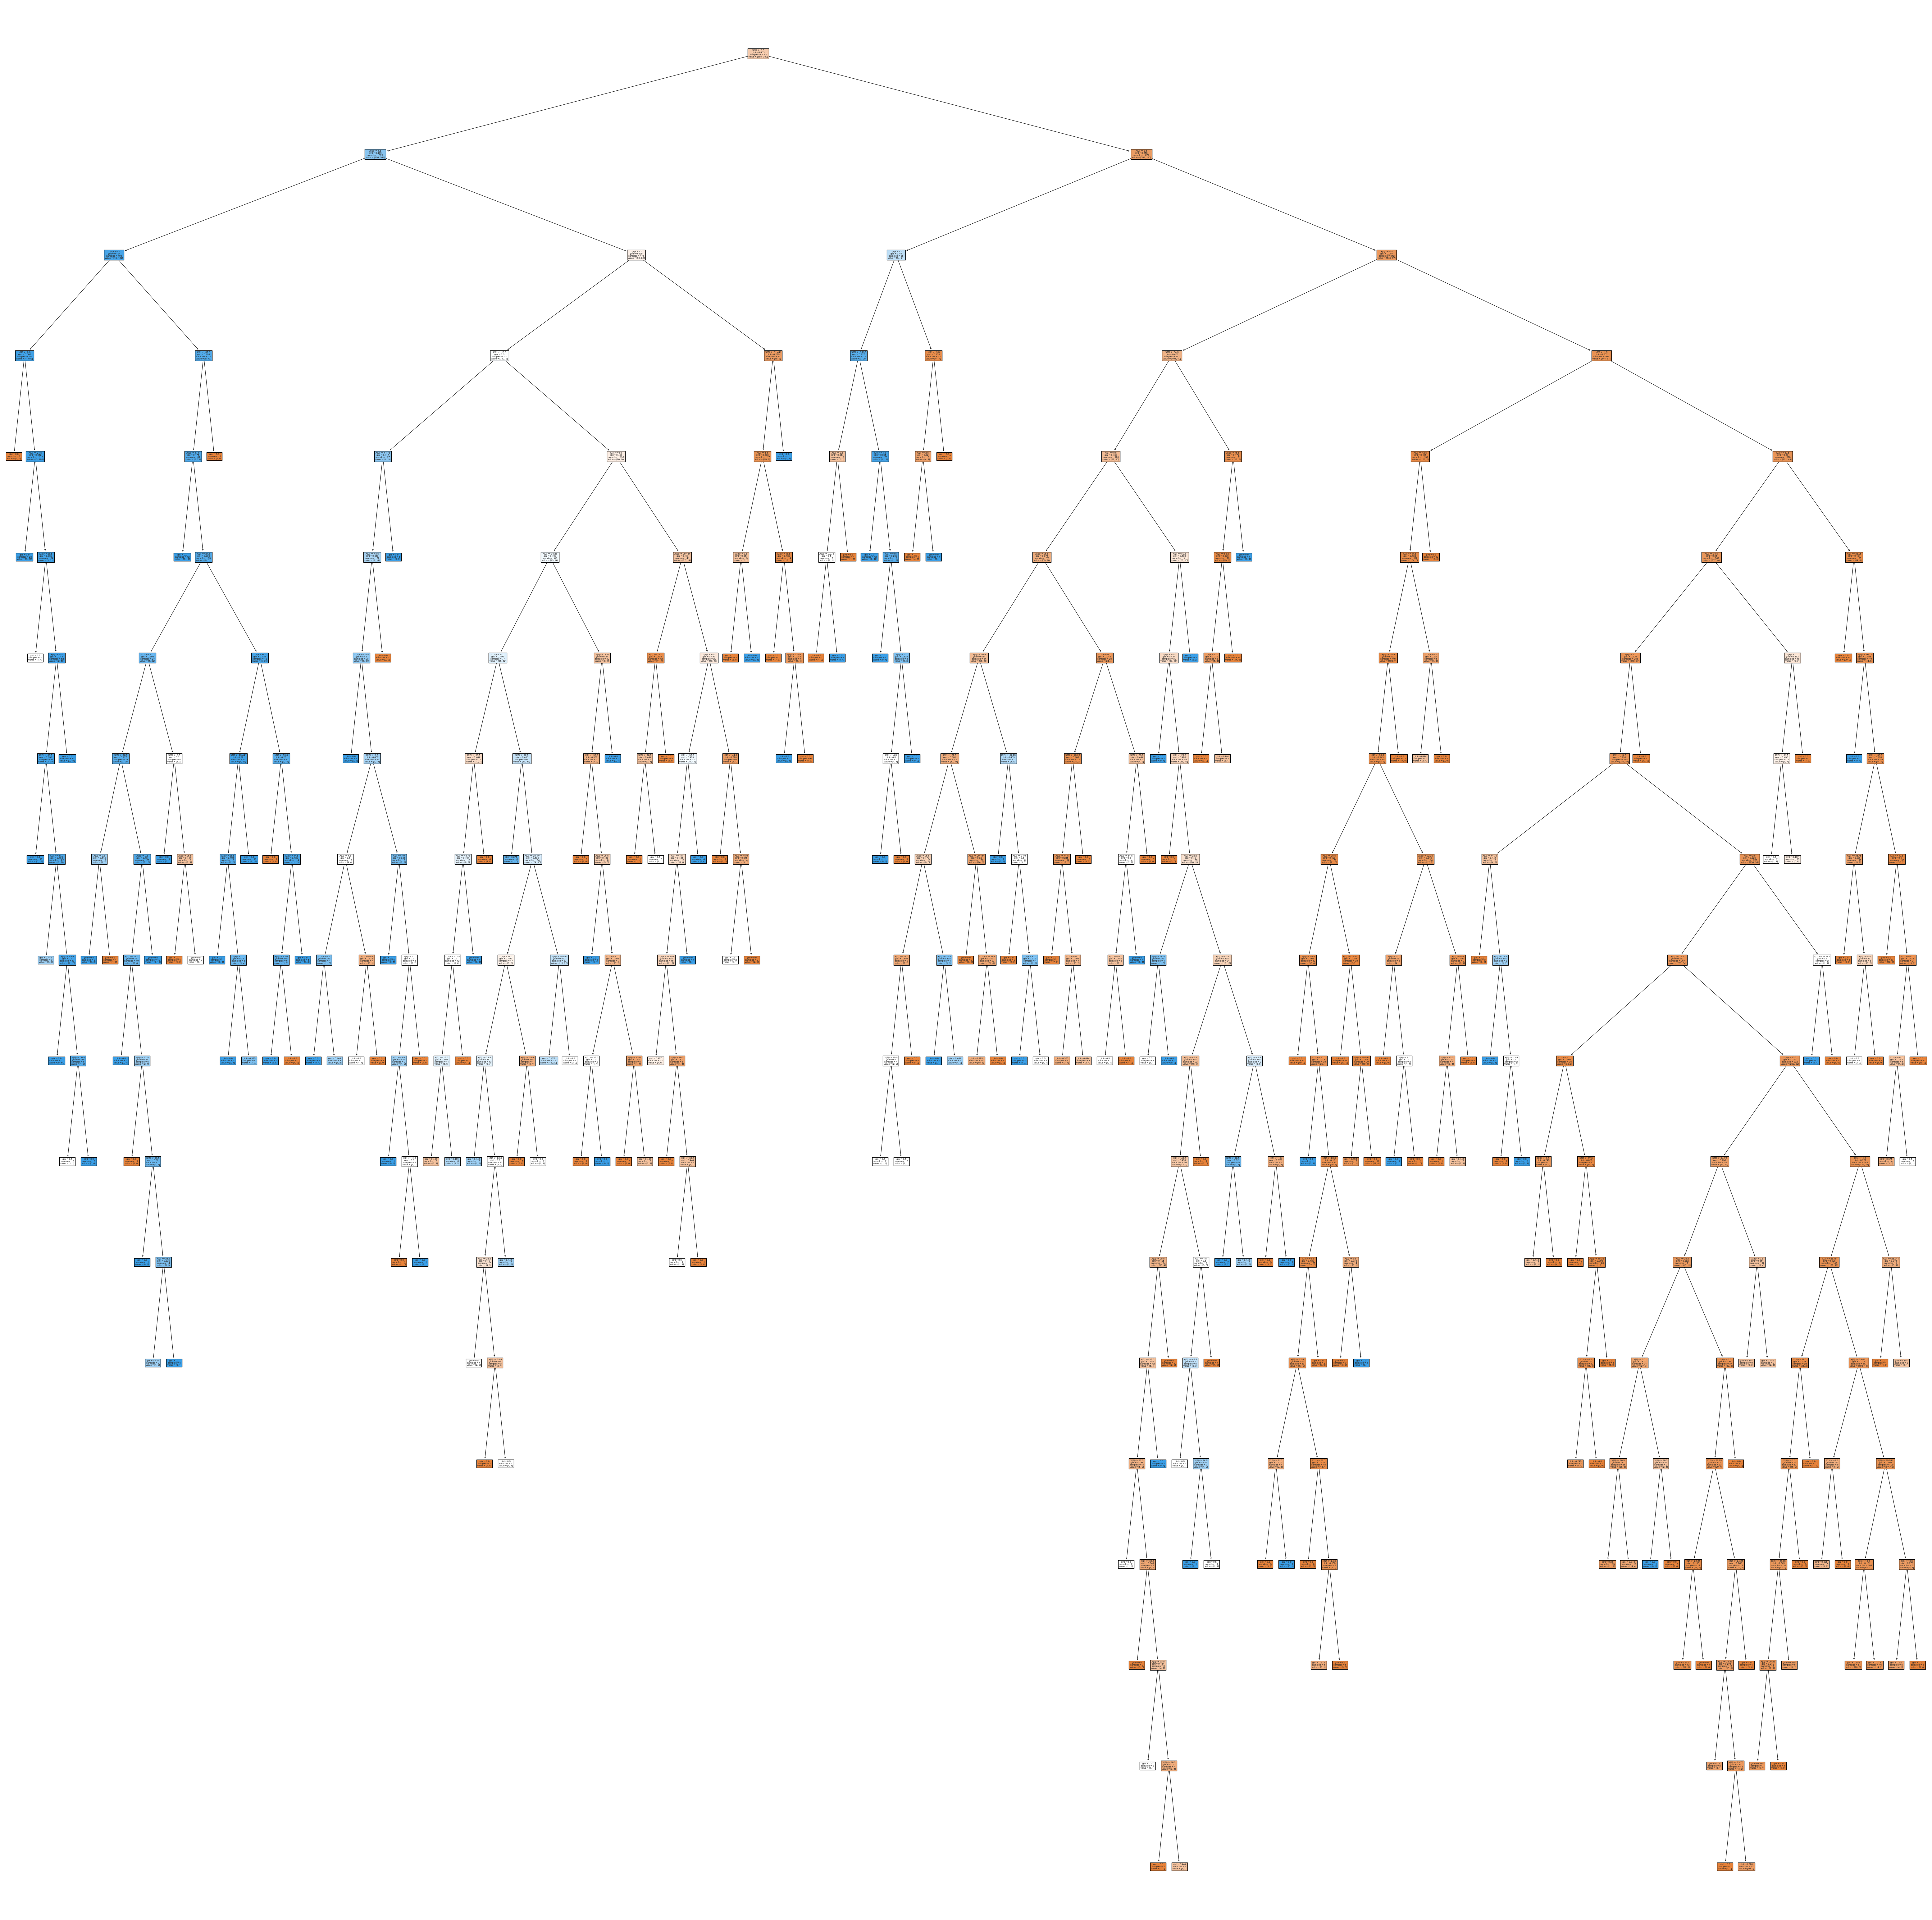

In [9]:
ordinal_encoder = OrdinalEncoder()
train_data["pclass"] = ordinal_encoder.fit_transform(train_data[["pclass"]])
train_data["sex"] = ordinal_encoder.fit_transform(train_data[["sex"]])
test_data["pclass"] = ordinal_encoder.fit_transform(test_data[["pclass"]])
test_data["sex"] = ordinal_encoder.fit_transform(test_data[["sex"]])

train_output = train_data[["survived"]]
train_input = train_data[["pclass","sex","age","sibsp"]]
test_output = test_data[["survived"]]
test_input = test_data[["pclass","sex","age","sibsp"]]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_input,train_output)

plt.figure(figsize=(80,80))
tree.plot_tree(clf, filled=True)

# Step 3: 
- Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

Fitting 3 folds for each of 98 candidates, totalling 294 fits
The best parameter max_leaf_nodes after use the GridSearchCV() function is:  40


[Text(0.5544642857142857, 0.9615384615384616, 'X[1] <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]'),
 Text(0.3482142857142857, 0.8846153846153846, 'X[0] <= 1.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]'),
 Text(0.3196428571428571, 0.8076923076923077, 'gini = 0.124\nsamples = 195\nvalue = [13, 182]'),
 Text(0.3767857142857143, 0.8076923076923077, 'X[3] <= 2.5\ngini = 0.498\nsamples = 175\nvalue = [93, 82]'),
 Text(0.26071428571428573, 0.7307692307692307, 'X[2] <= 16.5\ngini = 0.5\nsamples = 157\nvalue = [78, 79]'),
 Text(0.11428571428571428, 0.6538461538461539, 'X[2] <= 14.75\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.08571428571428572, 0.5769230769230769, 'X[2] <= 13.5\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.05714285714285714, 0.5, 'X[2] <= 0.875\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.02857142857142857, 0.4230769230769231, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.08571428571428572, 0.4230769230769231, 'X[2] <= 3.

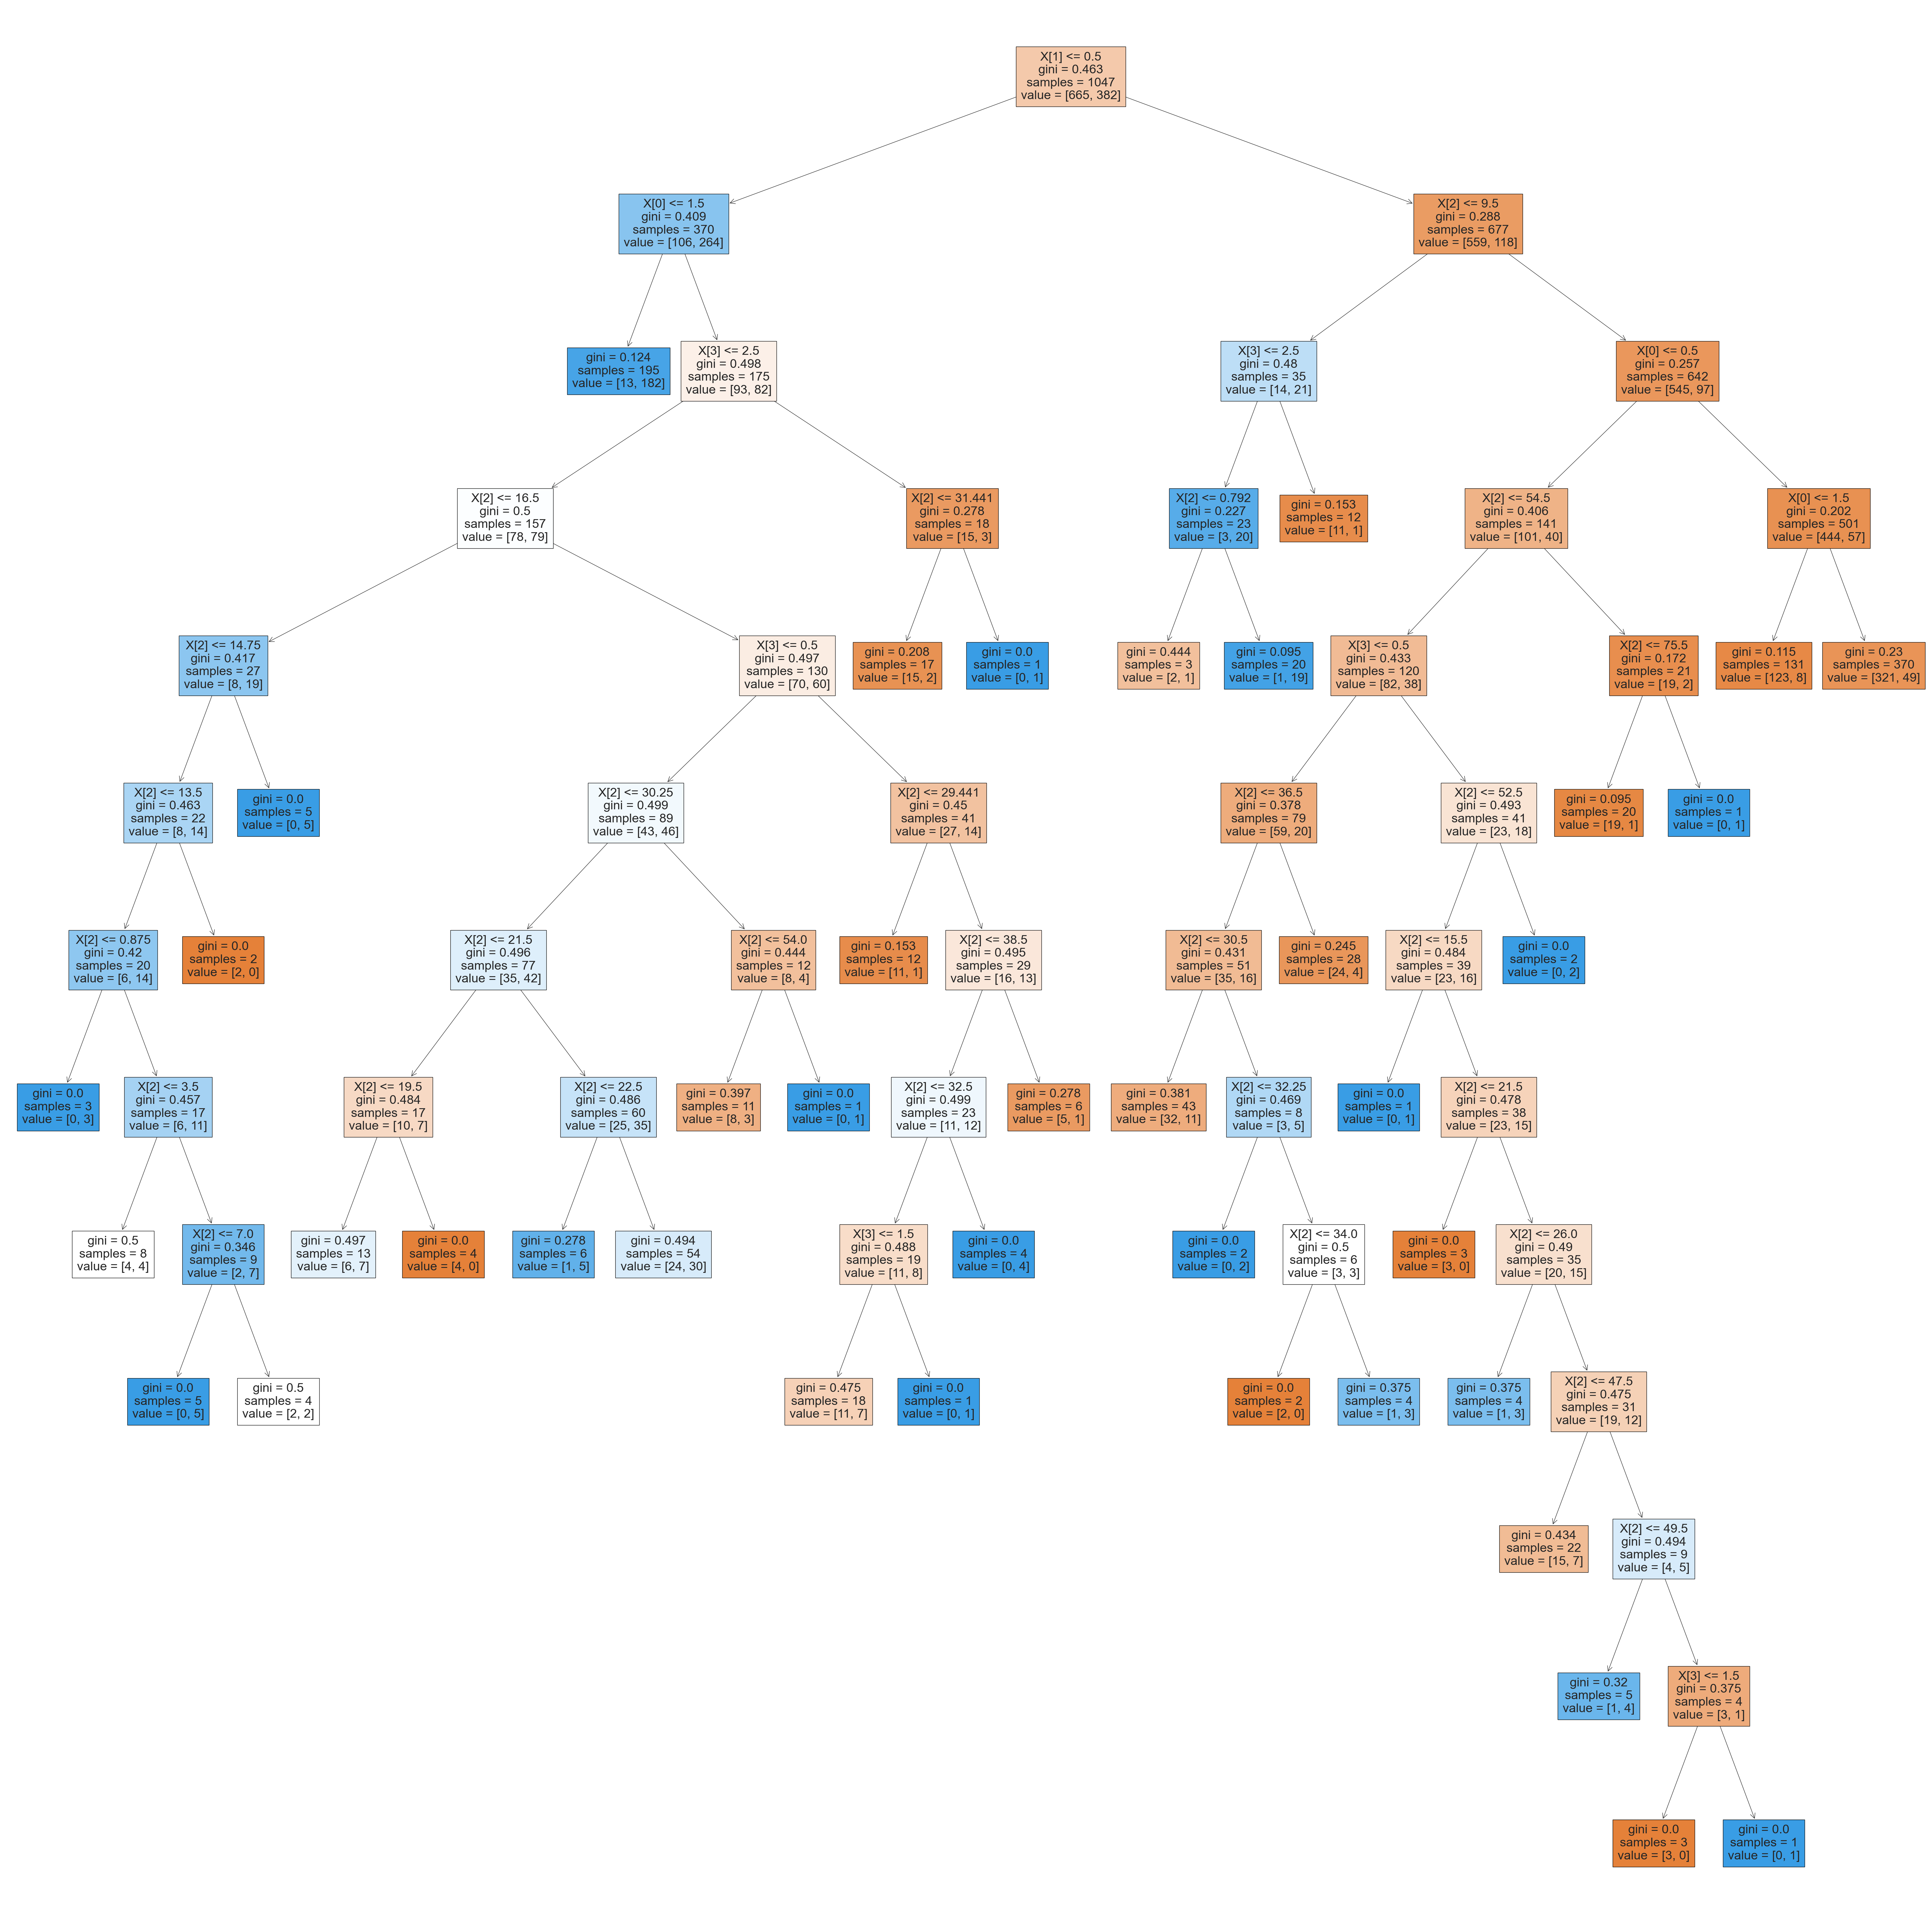

In [10]:
param_grid = {'max_leaf_nodes': list(range(2, 100))}
model = tree.DecisionTreeClassifier()

grid_search_cv = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search_cv.fit(train_input,train_output)
best_para = grid_search_cv.best_params_["max_leaf_nodes"]

print("The best parameter max_leaf_nodes after use the GridSearchCV() function is: ", best_para)

pruned_tree = tree.DecisionTreeClassifier(max_leaf_nodes=best_para)
pruned_tree.fit(train_input,train_output)

plt.figure(figsize=(80,80))
tree.plot_tree(pruned_tree, filled=True)

# Step 4: 
- For the pruned tree, report its accuracy on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)

In [11]:
from sklearn.metrics import precision_score

In [17]:
output_pred = pruned_tree.predict(test_input)
print(output_pred.shape)
y_act_pre = np.array([test_output["survived"].tolist(), output_pred]).T
y_sum = y_act_pre.sum(axis = 1)
sur_corr_pre = np.count_nonzero(y_sum==2)
sur_pre_total = test_output["survived"].sum()
fata_corr_pre = np.count_nonzero(y_sum==0)
fata_pre_total = len(output_pred)-test_output["survived"].sum()
x = recall_score(test_output, output_pred, average=None)
print(x)
y = precision_score(test_output, output_pred, average=None)
print(y)

print(f"The percent survivors correctly predicted (on test set) is {(sur_corr_pre/sur_pre_total*100).round(2)}%")
print(f"The percent fatalities correctly predicted (on test set) is {(fata_corr_pre/fata_pre_total*100).round(2)}%")

(262,)
[0.89583333 0.61016949]
[0.73714286 0.82758621]
The percent survivors correctly predicted (on test set) is 61.02%
The percent fatalities correctly predicted (on test set) is 89.58%


# Step 5: 
- Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set) Check whether there is improvement as compared to a single tree obtained in Step 4.

In [15]:
random_for = RandomForestClassifier(n_estimators = 50,max_leaf_nodes = best_para, n_jobs=-1, random_state=42)
random_for.fit(train_input,train_output)

output_pred_fore = random_for.predict(test_input)
y_act_pre_fore = np.array([test_output["survived"].tolist(), output_pred_fore]).T
y_sum_fore = y_act_pre_fore.sum(axis = 1)
sur_corr_pre_fore = np.count_nonzero(y_sum_fore==2)
sur_pre_total_fore = output_pred_fore.sum()
fata_corr_pre_fore = np.count_nonzero(y_sum==0)
fata_pre_total_fore = len(output_pred_fore)-output_pred_fore.sum()
x = recall_score(test_output, output_pred_fore, average=None)
print(x)
y = precision_score(test_output, output_pred_fore, average=None)
print(y)

print(f"The percent survivors correctly predicted (on test set) is {sur_corr_pre_fore/sur_pre_total_fore*100:.2f}%")
print(f"The percent fatalities correctly predicted (on test set) is {fata_corr_pre_fore/fata_pre_total_fore*100:.2f}%")
print("With the same max_leaf_nodes, we can see Random Forest have an improvement in percent survivors correctly predicted" +
      ", but the percent fatalities correctly predicted does not improve.")

[0.90277778 0.57627119]
[0.72222222 0.82926829]
The percent survivors correctly predicted (on test set) is 82.93%
The percent fatalities correctly predicted (on test set) is 71.67%
With the same max_leaf_nodes, we can see Random Forest have an improvement in percent survivors correctly predicted, but the percent fatalities correctly predicted does not improve.


/var/folders/xh/9s8p6wv51lb17v8j4lqd9zrr0000gn/T/ipykernel_27918/992781320.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_for.fit(train_input,train_output)
